In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Upload csv
from google.colab import files


uploaded = files.upload()

Saving used_cars.csv to used_cars (1).csv


In [ ]:
data = pd.read_csv('used_cars.csv')
data.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [ ]:
data_choosen = data[['region','price','year','manufacturer','odometer','lat','long']]
data_choosen.head()

,region,price,year,manufacturer,odometer,lat,long
0,salt lake city,17899,2012.0,volkswagen,63500.0,40.7372,-111.858
1,salt lake city,0,2016.0,ford,10.0,40.5881,-111.884
2,salt lake city,46463,2015.0,gmc,7554.0,40.5881,-111.884
3,salt lake city,0,2016.0,ford,10.0,40.5881,-111.884
4,salt lake city,49999,2018.0,ford,70150.0,40.3744,-104.694


In [ ]:
import numpy as np

def handle_non_numerical_data(data_choosen):
    columns = data_choosen.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if data_choosen[column].dtype != np.int64 and data_choosen[column].dtype != np.float64:
            column_contents = data_choosen[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            data_choosen[column] = list(map(convert_to_int, data_choosen[column]))

    return data_choosen

In [ ]:
data_conv = handle_non_numerical_data(data_choosen)
print(data_conv)

       region  price    year  manufacturer  odometer      lat     long
0          13  17899  2012.0             8   63500.0  40.7372 -111.858
1          13      0  2016.0            27      10.0  40.5881 -111.884
2          13  46463  2015.0            36    7554.0  40.5881 -111.884
3          13      0  2016.0            27      10.0  40.5881 -111.884
4          13  49999  2018.0            27   70150.0  40.3744 -104.694
...       ...    ...     ...           ...       ...      ...      ...
19996       3  49999  2016.0            21   43406.0  46.2348 -119.128
19997       3  12127  2018.0            28   32867.0  46.5642 -120.496
19998       3      0  2019.0            16   17514.0  46.0783 -118.293
19999       3  14661  2017.0            34   30486.0  46.5642 -120.496
20000       3  35999  2019.0            34   22078.0  46.2348 -119.128

[20001 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data_conv_new = data_conv.fillna(0)
print(data_conv_new)

       region  price    year  manufacturer  odometer      lat     long
0          13  17899  2012.0             8   63500.0  40.7372 -111.858
1          13      0  2016.0            27      10.0  40.5881 -111.884
2          13  46463  2015.0            36    7554.0  40.5881 -111.884
3          13      0  2016.0            27      10.0  40.5881 -111.884
4          13  49999  2018.0            27   70150.0  40.3744 -104.694
...       ...    ...     ...           ...       ...      ...      ...
19996       3  49999  2016.0            21   43406.0  46.2348 -119.128
19997       3  12127  2018.0            28   32867.0  46.5642 -120.496
19998       3      0  2019.0            16   17514.0  46.0783 -118.293
19999       3  14661  2017.0            34   30486.0  46.5642 -120.496
20000       3  35999  2019.0            34   22078.0  46.2348 -119.128

[20001 rows x 7 columns]


In [ ]:
data_new_choosen = data_conv_new[['price','manufacturer']]
data_new_choosen

,price,manufacturer
0,17899,8
1,0,27
2,46463,36
3,0,27
4,49999,27
...,...,...
19996,49999,21
19997,12127,28
19998,0,16
19999,14661,34


In [ ]:
#normalisasi data
data_normal = data_new_choosen/np.linalg.norm(data_new_choosen)
data_normal

,price,manufacturer
0,0.000015,6.785961e-09
1,0.000000,2.290262e-08
2,0.000039,3.053682e-08
3,0.000000,2.290262e-08
4,0.000042,2.290262e-08
...,...,...
19996,0.000042,1.781315e-08
19997,0.000010,2.375086e-08
19998,0.000000,1.357192e-08
19999,0.000012,2.884033e-08


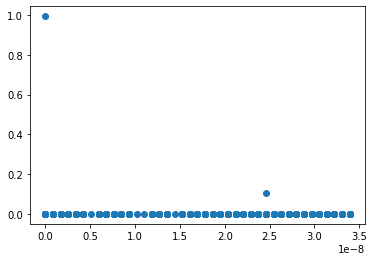

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
price = data_normal['price'].values
manufacturer = data_normal['manufacturer'].values
#ax.set_xlim(max(data_normal['manufacturer'].values))
#ax.set_ylim(max(data_normal['price'].values))
ax.scatter(manufacturer, price)

In [ ]:
from sklearn.cluster import KMeans
#WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.
wcss=[]

for i in range (1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=100, random_state=0)
    kmeans.fit(data_new)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

NameError: ignored

In [ ]:
#cluster 1
#menggunakan 3 cluster karena dari elbow method didapatkan nilai 3 yg terbaik untuk cluster
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0)
y_kmeans = kmeans.fit_predict(data_new)
#X = data_new

cluster = y_kmeans
data_new['class'] = cluster
X = np.array(list(data_new.loc[:,:].values))

class_0 = (len(data_new[data_new['class'] == 0]))
class_1 = (len(data_new[data_new['class'] == 1]))
class_2 = (len(data_new[data_new['class'] == 2]))
data_new

# Visualisasi cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='blue',label='volkswagen = '+str(class_0))
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='green',label='gmc = '+str(class_1))
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='red',label='ford = '+str(class_2))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters Berdasarkan Brand Mobil')
plt.legend()
plt.show()

In [ ]:
#cluster 2
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0)
y_kmeans = kmeans.fit_predict(data_normal)

#X = data_new

cluster = y_kmeans
data_normal['class'] = cluster
X = np.array(list(data_normal.loc[:,:].values))

class_0 = (len(data_normal[data_normal['class'] == 0]))
class_1 = (len(data_normal[data_normal['class'] == 1]))
class_2 = (len(data_normal[data_normal['class'] == 2]))
data_normal

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='volkswagen = '+str(class_0))
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='gmc = '+str(class_1))
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='ford = '+str(class_2))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters Berdasarkan Brand Mobil')
plt.legend()
plt.show()